In [246]:
#insert an import statement that will emulate python3 behavior if run under python 2.x
from __future__ import print_function, division 

#import packages that we'll use often.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#set some sensible defaults for figures
matplotlib.rc('figure', figsize = (12.0, 12.0), dpi = 300 )
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 
matplotlib.rc('axes', labelsize=15) 

#this 'magic' matplotlib command tells iPython to show any figures in this notebook, 
#rather than a separate window or saving them in separate files.
%matplotlib inline

#initialize physics constants -- remain global variables throughout script/notebook
                                #can be accessed within a function (no need to pass physical constants to a function)
g = 9.81 #m/s^2
rho_atmosphere = 1.225 #kg/m^3

In [268]:
#define a 'fallingObject' class to allow for efficient initializing of multiple objects
#i.e. to retrive the object's mass; test.mass = __
class fallingObject:

    def __init__(self, dragParam, area, v0, y0):
        #add a parameter C/mass? 
        self.dragParam = dragParam
        #self.mass = mass
        self.area = area
        #self.dragCo = C
        self.xVel = v0
        self.height = y0
        
#make a short routine that initializes an array of times with length = length and n_steps = n_steps
def makeTimeArray(length, timeStep):
    n_steps = np.ceil(length/timeStep)+1
    timeArray = np.linspace(0, length, n_steps)
    return timeArray

#make a short routine to calculate drag once all the parameters are known
def calculateDrag(fallOb, v, vComp):
    if vComp >= 0: 
        drag = -(fallOb.dragParam*fallOb.area*rho_atmosphere*v*vComp)
    else: 
        drag = (fallOb.dragParam*fallOb.area*rho_atmosphere*v*abs(vComp))
                
    return drag

def findVelocity(xvel, yvel):
    v = math.sqrt(xvel**2 + yvel**2)
    return v

#make a short routine to calculate a new velocity given 
#the object properties, velcoties and timestep
def newVelocities(fallOb, vxNow, vyNow, timestep):
    v = findVelocity(vxNow, vyNow)
    dragAccelx = calculateDrag(fallOb, v, vxNow)
    dragAccely = calculateDrag(fallOb, v, vyNow)
    netAccely = -g + dragAccely
    newVelx = vxNow + dragAccelx*timestep
    newVely = vyNow + netAccely*timestep
    return newVelx, newVely
                
#make a short routine to calculate a new position given 
#the initial position, velocity and timestep
def newPosition(disp, vNow, timeStep):
    newPosition = disp + vNow*timeStep
    return newPosition

In [367]:
#Numerical solution with Euler method
def modelFall(fallOb, model_time, timestep):
    times = makeTimeArray(model_time, timestep)
    
    n_steps = times.size
    
    xVel = np.zeros(n_steps)
    xVel[0] = fallOb.xVel
    
    yVel = np.zeros(n_steps)
    #yVel[0] = 0 already
    
    xPos = np.zeros(n_steps)
    #xPos[0] = 0 already
    
    yPos = np.zeros(n_steps)
    yPos[0] = fallOb.height

    i = 0
    while (yPos[i] > 0) and (i < n_steps-1):
        xVel[i+1], yVel[i+1] = newVelocities(fallOb, xVel[i], yVel[i], timestep)
        xPos[i+1] = newPosition(xPos[i], xVel[i], timestep)
        yPos[i+1] = newPosition(yPos[i], yVel[i], timestep)
        i = i + 1
    
    #find the time object it the ground, between the above and below ground indices
    
    m = -timestep/(yPos[i] - yPos[i-1])
    tHit = times[i-1]- m*yPos[i-1]
    
    r = - (yPos[i-1]/yPos[i])
    final_xdist = (xPos[i-1] + r*xPos[i])/(r + 1)   #book eq. 2.21
    return times, xPos, yPos, xVel, yVel, tHit, final_xdist

In [321]:
#calculate the end result with no drag, for comparison
def noDrag(v0,y0,timeLength):
    vy_final = -9.81*timeLength
    y_final = y0 - 0.5*9.8*timeLength**2
    x_final = v0*timeLength
    return x_final, y_final, vy_final

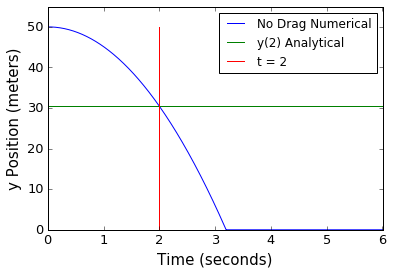

In [497]:
object1 = fallingObject(0, 1, 0, 50)
time1, x1, y1, xvel1, yvel1, tHit1, finalx1 = modelFall(object1, 50, 0.01)

plt.ylim(0, 55)
plt.xlim(0, 6)

plt.plot(time1, y1)

plt.xlabel("Time (seconds)")
plt.ylabel("y Position (meters)")

x_fin, y_fin, vy_fin = noDrag(0, 50, 2)

plt.plot([0,10], [y_fin, y_fin])
plt.plot([2, 2], [0, 50])
plt.legend(["No Drag Numerical", "y(2) Analytical", "t = 2"])
plt.savefig('../school_stuff/CompPhysFigures/HW2_fig6.png')

No Velocity 4.83369304045 0.0
X Velocity 5.09151497872 27.7207660456
0.257821938268


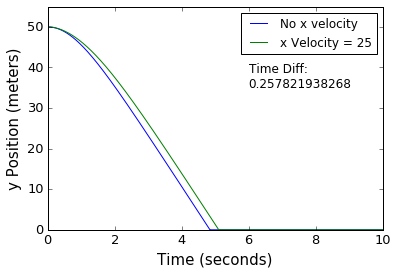

In [496]:
#falling object (dragParam area, v0, y0)
#modelFall (fallOb, model_time, timestep)

object1 = fallingObject(0.05, 1, 0, 50)
object2 = fallingObject(0.05, 1, 25, 50)
time1, x1, y1, xvel1, yvel1, tHit1, finalx1 = modelFall(object1, 50, 0.01)
time2, x2, y2, xvel2, yvel2, tHit2, finalx2 = modelFall(object2, 50, 0.01)

plt.ylim(0, 55)
plt.xlim(0, 10)

plt.plot(time1, y1)
plt.plot(time2, y2)
plt.xlabel("Time (seconds)")
plt.ylabel("y Position (meters)")
tdiff = "Time Diff:\n"+str((tHit2-tHit1))
plt.annotate(tdiff, xy=(6, 35), fontsize = 12)

plt.legend(['No x velocity', 'x Velocity = 25'])

#print time when it hit the ground and final x positions
print("No Velocity", tHit1, finalx1)
print("X Velocity", tHit2, finalx2)
print(tHit2-tHit1)
#plt.savefig('../school_stuff/CompPhysFigures/HW2_fig5.png')

In [407]:
#test the model!
#convergence test
def test_convergence(ob1, model_time, init_time_step, num_steps):
    stepSizes = np.zeros(num_steps-1)
    times = np.zeros(num_steps-1)
    xPos = np.zeros(num_steps-1)
    
    for x in range(0, num_steps-1):
        time1, x1, y1, xvel1, yvel1, tHit1, finalx1= modelFall(ob1, model_time, (init_time_step/(2**x)))
        stepSizes[x] = time1[1]  - time1[0]
        times[x] = tHit1
        xPos[x] = finalx1
        
    return stepSizes, times, xPos

#dragParam test
def test_dragParam(ob1, ob2, model_time, time_step, num_steps, step_size):
    stepSizes = np.zeros(num_steps)
    timediff = np.zeros(num_steps)
    
    for x in range(0, num_steps):
        ob1.dragParam = step_size*x
        ob2.dragParam = step_size*x
        time1, x1, y1, xvel1, yvel1, tHit1, finalx1= modelFall(ob1, model_time, time_step)
        time2, x2, y2, xvel2, yvel2, tHit2, finalx1= modelFall(ob2, model_time, time_step)
        stepSizes[x] = step_size*x
        timediff[x] = tHit2 - tHit1
        
    return stepSizes, timediff

#velocity test
def test_velocity(ob1, ob2, model_time, time_step, num_steps, step_size):
    stepSizes = np.zeros(num_steps)
    timediff = np.zeros(num_steps)
    time1, x1, y1, xvel1, yvel1, tHit1, finalx1= modelFall(ob1, model_time, time_step)
    
    for x in range(0, num_steps):
        ob2.xVel = step_size*x
        time2, x2, y2, xvel2, yvel2, tHit2, finalx1= modelFall(ob2, model_time, time_step)
        stepSizes[x] = step_size*x
        timediff[x] = tHit2 - tHit1
        
    return stepSizes, timediff

#height test
def test_height(ob1, ob2, model_time, time_step, num_steps, step_size):
    stepSizes = np.zeros(num_steps)
    timediff = np.zeros(num_steps)
    
    for x in range(0, num_steps):
        ob1.height = step_size*x
        ob2.height = step_size*x
        time1, x1, y1, xvel1, yvel1, tHit1, finalx1= modelFall(ob1, model_time, time_step)
        time2, x2, y2, xvel2, yvel2, tHit2, finalx1= modelFall(ob2, model_time, time_step)
        stepSizes[x] = step_size*x
        timediff[x] = tHit2 - tHit1
        
    return stepSizes, timediff

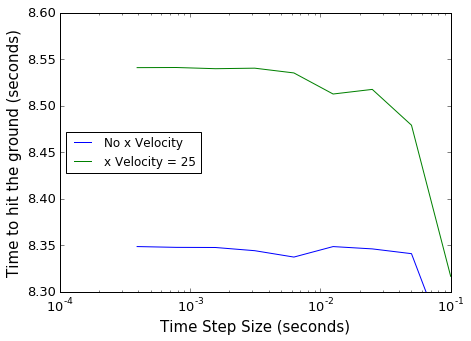

In [481]:
#test convergence for both with and without x velocity
object1 = fallingObject(0.2, 1, 0, 50)
object2 = fallingObject(0.2, 1, 25, 50)

steps1, times1, x1 = test_convergence(object1, 10, 0.1, 10)
steps2, times2, x2 = test_convergence(object2, 10, 0.1, 10)

ob1, = plt.plot(steps1, times1, label = 'No x Velocity')
ob2, = plt.plot(steps2, times2, label = 'x Velocity = 25')

plt.xscale('log')
plt.ylim(8.3, 8.6)

plt.xlabel("Time Step Size (seconds)")
plt.ylabel("Time to hit the ground (seconds)")
plt.legend(handles = [ob1, ob2], loc = 6)
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.savefig('../school_stuff/CompPhysFigures/HW2_fig1.png')

In [398]:
#test drag parameter
object1 = fallingObject(0, 1, 0, 50)
object2 = fallingObject(0, 1, 25, 50)

#steps, timediff = test_dragParam(object1, object2, 100, 0.001, 500, 0.01)

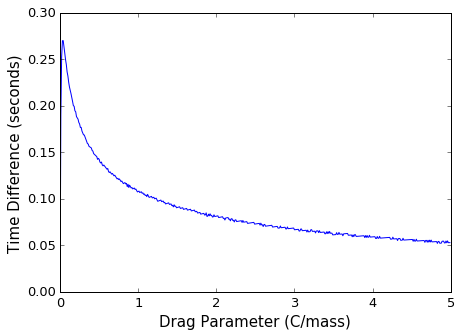

In [478]:
plt.plot(steps, timediff)

plt.ylabel("Time Difference (seconds)")
plt.xlabel("Drag Parameter (C/mass)")

fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.savefig("../school_stuff/CompPhysFigures/HW2_fig2.png")

In [425]:
#test velocity nd show various drag parameters
object1 = fallingObject(.2, 1, 0, 50)
object2 = fallingObject(.2, 1, 0, 50)

stepsVel1, timeDiffVel1 = test_velocity(object1, object2, 100, 0.001, 100, 1)

object3 = fallingObject(.3, 1, 0, 50)
object4 = fallingObject(.3, 1, 0, 50)

stepsVel2, timeDiffVel2 = test_velocity(object3, object4, 100, 0.001, 100, 1)

object5 = fallingObject(.4, 1, 0, 50)
object6 = fallingObject(.4, 1, 0, 50)

stepsVel3, timeDiffVel3 = test_velocity(object5, object6, 100, 0.001, 100, 1)

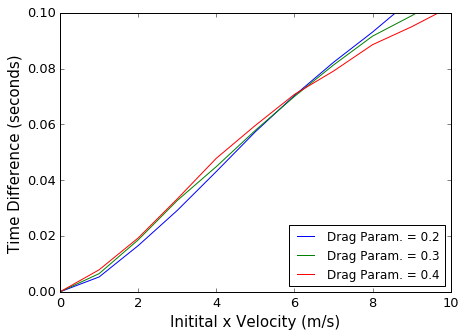

In [500]:
plt.plot(stepsVel1, timeDiffVel1)
plt.plot(stepsVel2, timeDiffVel2)
plt.plot(stepsVel3, timeDiffVel3)

plt.ylabel("Time Difference (seconds)")
plt.xlabel("Initital x Velocity (m/s)")

plt.legend(["Drag Param. = 0.2", "Drag Param. = 0.3", "Drag Param. = 0.4"], loc = 4)
plt.xlim(0, 10)
plt.ylim(0, 0.1)

fig = plt.gcf()
fig.set_size_inches(7, 5)
#plt.savefig("../school_stuff/CompPhysFigures/HW2_fig3.png")

In [453]:
#test hieght and show various drag parameters
object1 = fallingObject(.2, 1, 0, 50)
object2 = fallingObject(.2, 1, 25, 50)

stepsy0, timeDiffy0 = test_height(object1, object2, 100, 0.0005, 60, 0.25)

object1 = fallingObject(.3, 1, 0, 50)
object2 = fallingObject(.3, 1, 25, 50)

stepsy1, timeDiffy1 = test_height(object1, object2, 100, 0.0005, 60, 0.25)

object1 = fallingObject(.4, 1, 0, 50)
object2 = fallingObject(.4, 1, 25, 50)

stepsy2, timeDiffy2 = test_height(object1, object2, 100, 0.0005, 60, 0.25)

C:\Users\J'Neil\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\J'Neil\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\J'Neil\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: invalid value encountered in double_scalars


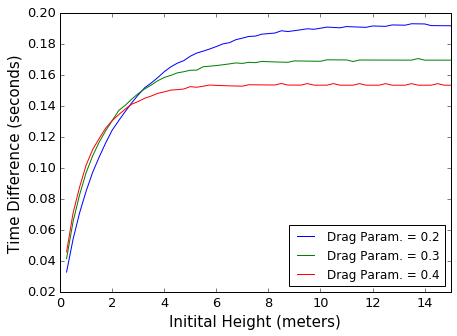

In [476]:
plt.plot(stepsy0, timeDiffy0)
plt.plot(stepsy1, timeDiffy1)
plt.plot(stepsy2, timeDiffy2)

plt.ylabel("Time Difference (seconds)")
plt.xlabel("Initital Height (meters)")
plt.xlim(0, 15)

plt.legend(["Drag Param. = 0.2", "Drag Param. = 0.3", "Drag Param. = 0.4"], loc = 4)
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.savefig("../school_stuff/CompPhysFigures/HW2_fig4.png")